Counting Images per Class in Train and Test Folders

In [1]:
#!pip install tensorflow-gpu

In [3]:
#!pip install tensorflow==2.14

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf

In [4]:
# Get the current working directory
current_directory = os.getcwd()
current_directory

'c:\\Users\\rcapi\\Downloads\\DeepLearning24_25'

In [5]:
# Define the paths to train and test directories
train_directory = current_directory + '/data/train'
test_directory = current_directory + '/data/test'
# Function to count the number of images in a directory
def count_images(directory):
    class_counts = {}
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            class_counts[folder] = len(os.listdir(folder_path))
    return class_counts

# Count images in train and test directories for each class
train_class_counts = count_images(train_directory)
test_class_counts = count_images(test_directory)

print("Number of images in each class in the train directory:")
print(train_class_counts)

print("\nNumber of images in each class in the test directory:")
print(test_class_counts)

Number of images in each class in the train directory:
{'benign': 1984, 'malignant': 4343}

Number of images in each class in the test directory:
{'benign': 496, 'malignant': 1086}


Checking the shapes of the images

In [5]:
# Define the paths to train and test directories
train_directory = current_directory + '/data/train'
test_directory = current_directory + '/data/test'

# Function to find the largest and smallest images in a directory
def find_extreme_images(directory):
    # Define the variables for the smallest and biggest images
    largest_image = None
    smallest_image = None
    largest_size = 0
    smallest_size = float('inf')  # Infinite number to initialize

    # Only loop through the 'benign' and 'malignant' subfolders
    for folder in ['benign', 'malignant']:
        folder_path = os.path.join(directory, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            # Open the image
            with Image.open(file_path) as img:
                img_size = img.size[0] * img.size[1]  # Width * Height to get the size
                # Update the largest and smallest image if necessary
                if img_size > largest_size:
                    largest_size = img_size
                    largest_image = file_path, img.size
                if img_size < smallest_size:
                    smallest_size = img_size
                    smallest_image = file_path, img.size

    return largest_image, smallest_image

# Find the largest and smallest images in the train and test directories
largest_train_image, smallest_train_image = find_extreme_images(train_directory)
largest_test_image, smallest_test_image = find_extreme_images(test_directory)

# Print results
print("Largest image in the train directory:")
print("File Path:", largest_train_image[0])
print("Size (Width x Height):", largest_train_image[1])
print("\nSmallest image in the train directory:")
print("File Path:", smallest_train_image[0])
print("Size (Width x Height):", smallest_train_image[1])
print("\nLargest image in the test directory:")
print("File Path:", largest_test_image[0])
print("Size (Width x Height):", largest_test_image[1])
print("\nSmallest image in the test directory:")
print("File Path:", smallest_test_image[0])
print("Size (Width x Height):", smallest_test_image[1])


Largest image in the train directory:
File Path: c:\Users\rcapi\Downloads\DeepLearning24_25/data/train\benign\SOB_B_A-14-22549AB-100-001.png
Size (Width x Height): (700, 460)

Smallest image in the train directory:
File Path: c:\Users\rcapi\Downloads\DeepLearning24_25/data/train\malignant\SOB_M_PC-14-12465-100-002.png
Size (Width x Height): (700, 456)

Largest image in the test directory:
File Path: c:\Users\rcapi\Downloads\DeepLearning24_25/data/test\benign\SOB_B_A-14-22549AB-100-002.png
Size (Width x Height): (700, 460)

Smallest image in the test directory:
File Path: c:\Users\rcapi\Downloads\DeepLearning24_25/data/test\malignant\SOB_M_PC-14-12465-100-001.png
Size (Width x Height): (700, 456)


In [6]:
# Define train and test directories
train_directory = current_directory + '/data/train'
test_directory = current_directory + '/data/test'

# Define the class labels
source_folders = ['benign', 'malignant']

# Initialize empty lists for train and test data
X_train = []
y_train = []
X_test = []
y_test = []

# Function to resize images and create numpy arrays
def resize_and_create_arrays(directory, X, y, target_size=(128, 128)):
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path) and folder in source_folders:
            label = source_folders.index(folder)  # 0 for benign, 1 for malignant
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                try:
                    with Image.open(file_path) as img:
                        # Resize image to target size
                        img_resized = img.resize(target_size)
                        # Convert image to numpy array
                        img_array = np.array(img_resized)
                        # Append image array to X and label to y
                        X.append(img_array)
                        y.append(label)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

# Resize images and create arrays for the train directory
resize_and_create_arrays(train_directory, X_train, y_train)

# Resize images andcreate arrays for the test directory
resize_and_create_arrays(test_directory, X_test, y_test)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print dataset information
print("Resized images and created X and y arrays.")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Resized images and created X and y arrays.
X_train shape: (6327, 128, 128, 3)
y_train shape: (6327,)
X_test shape: (1582, 128, 128, 3)
y_test shape: (1582,)


In [7]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [9]:
X_train= tf.constant(X_train, dtype='float32')
X_test= tf.constant(X_test, dtype='float32')
y_train= tf.constant(y_train, dtype='float32')
y_test= tf.constant(y_test, dtype='float32')

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1:])))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=AdamW(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [11]:
# Train the model
history = model.fit(
    X_train, y_train, 
    batch_size=150, 
    epochs=100, 
    validation_split=0.25, 
    verbose=1, 
    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
32/32 [==============================] - 84s 3s/step - loss: 0.6557 - accuracy: 0.6131 - val_loss: 0.5986 - val_accuracy: 0.7080 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 84s 3s/step - loss: 0.6202 - accuracy: 0.6552 - val_loss: 0.5328 - val_accuracy: 0.7080 - lr: 1.0000e-04
Epoch 3/100
32/32 [==============================] - 85s 3s/step - loss: 0.5641 - accuracy: 0.6988 - val_loss: 0.4945 - val_accuracy: 0.8116 - lr: 1.0000e-04
Epoch 4/100
32/32 [==============================] - 85s 3s/step - loss: 0.5204 - accuracy: 0.7638 - val_loss: 0.4665 - val_accuracy: 0.8180 - lr: 1.0000e-04
Epoch 5/100
32/32 [==============================] - 79s 2s/step - loss: 0.4931 - accuracy: 0.7952 - val_loss: 0.4548 - val_accuracy: 0.8211 - lr: 1.0000e-04
Epoch 6/100
32/32 [==============================] - 79s 2s/step - loss: 0.4899 - accuracy: 0.8078 - val_loss: 0.4447 - val_accuracy: 0.8236 - lr: 1.0000e-04
Epoch 7/100
32/32 [==============================] -

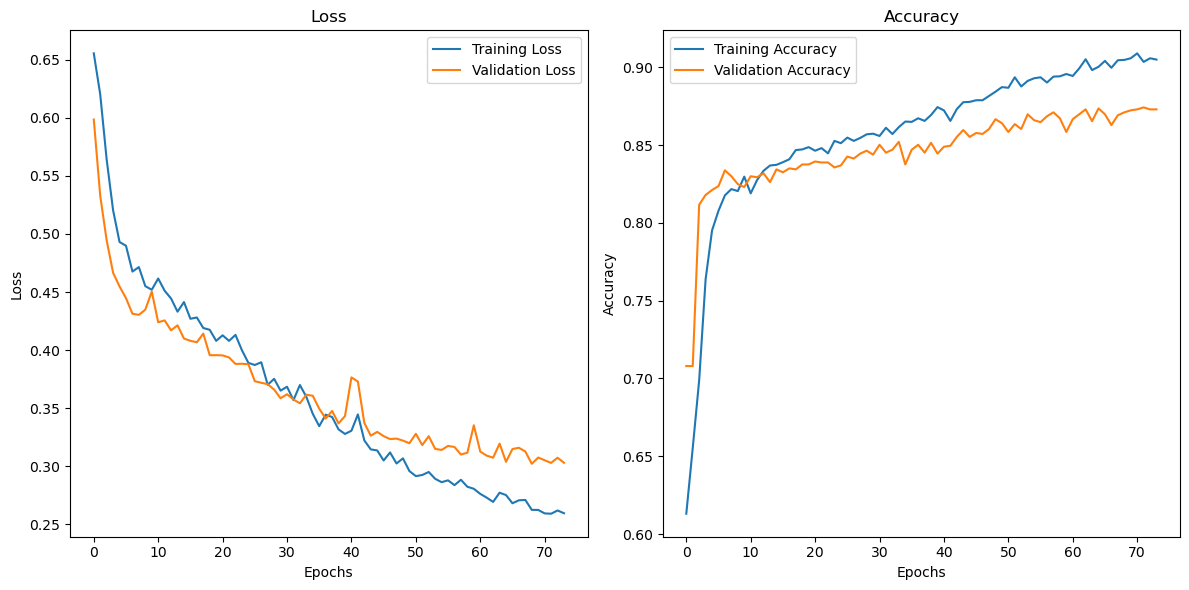

In [12]:
# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Predict on the test set
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

50/50 [==============================] - 6s 119ms/step - loss: 0.2708 - accuracy: 0.8989
Test Loss: 0.2708262503147125
Test Accuracy: 0.8988621830940247


In [19]:
report = classification_report(y_test, y_pred_binary)
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       496
         1.0       0.92      0.93      0.93      1086

    accuracy                           0.90      1582
   macro avg       0.88      0.88      0.88      1582
weighted avg       0.90      0.90      0.90      1582



Trying with a pretrained model now

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0

In [21]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers[:-10]:
    layer.trainable = False

x = base_model.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    batch_size=200,
    epochs=50,
    validation_split=0.25,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
24/24 [==============================] - 108s 4s/step - loss: 2.3471 - accuracy: 0.5911 - val_loss: 0.6766 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 2/50
24/24 [==============================] - 93s 4s/step - loss: 0.6356 - accuracy: 0.6792 - val_loss: 0.6917 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 3/50
24/24 [==============================] - 97s 4s/step - loss: 0.6345 - accuracy: 0.6795 - val_loss: 0.6837 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 4/50
24/24 [==============================] - 91s 4s/step - loss: 0.6465 - accuracy: 0.6744 - val_loss: 0.6789 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 5/50
24/24 [==============================] - 90s 4s/step - loss: 0.6444 - accuracy: 0.6719 - val_loss: 0.6547 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 6/50
24/24 [==============================] - 89s 4s/step - loss: 0.6458 - accuracy: 0.6731 - val_loss: 0.6350 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 7/50
24/24 [==============================] - 91s 4s/step - loss: 0.6353 - 

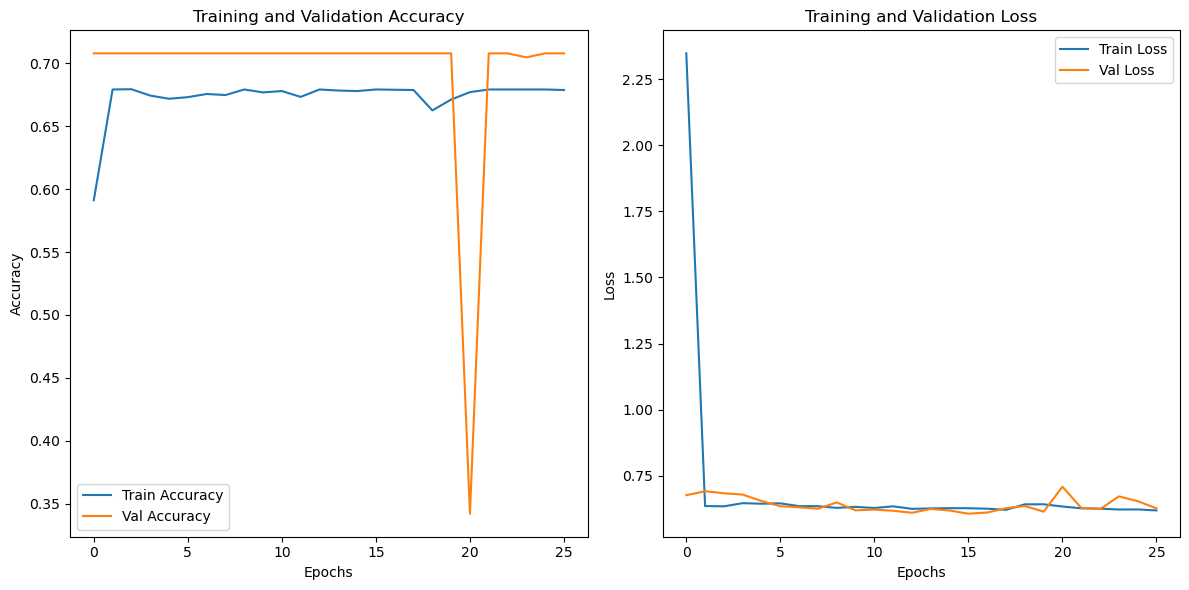

In [22]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')